### Code

Required Packages

In [5]:
import random
import pandas as pd
import time
import re
import csv
import urllib
import csv
from datetime import datetime
from getpass import getpass
from bs4 import BeautifulSoup
from pprint import pprint
from parsel import Selector
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from urllib.parse import urlparse
import numpy as np
import ipywidgets as widgets
#pip install ipywidgets

Setting Up the driver

In [6]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version 83.0.4103
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_mac64.zip


[WDM] - Unpack archive /Users/nishantanand/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver.zip


## Glassdoor

- Function  :fetchTopCompanies()
- Desc :Fetches the list of top companies along with their rating and url. 

In [7]:
Links = []
Names = []
Ranks =[]
def fetchTopCompanies(totalPage):
    url = 'https://www.glassdoor.com/Explore/browse-companies.htm?overall_rating_low=3.5&page=1&isHiringSurge=0'
    driver.get(url)
    pageCount=0
    while True:
        time.sleep(5)
        pageCount=pageCount+1
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        GlassdoorUrl = 'https://www.glassdoor.com'
        companyList = BeautifulSoup(driver.page_source, 'lxml')
        
        for span in companyList.find_all('div', class_='col-12 col-lg-8 order-0'):
            for j in span.find_all('span', class_='align-items-center mb-xsm'):
                h2 = j.find('h2')
                company_names = h2.text
                Names.append(company_names)
                for k in j.find_all('div', class_='d-flex align-items-center'):
                    span = k.find('span', class_='common__commonStyles__greenText common__commonStyles__strong pr-xsm')
                    company_rating = span.text
                    Ranks.append(company_rating)
                
                    
        for span in companyList.find_all('div', class_='row d-flex flex-wrap'):
            if span.find('div', class_='col-12 my-0 mt-sm mt-sm-std order-5'):
                a = span.find_all('a')[-1]
                company_link = GlassdoorUrl + a['href']
            else:
                company_link ="NA"
            Links.append(company_link)            

        if (pageCount>=totalPage):
            break
        else:
            nextPage = driver.find_element_by_class_name('ml-xsm')
            nextPage.click()

- Function : fetchCompanyDetails()

- Desc : Fetches all the details of the company like the the size, type, revenue etc., of the company. Also extracts the interview information of the company like the experince of the interview, percentage of people who landed an interview through various channels and the difficulty level of the interview for the companies we fetched in the above function.

In [8]:
finalList =[]
def fetchCompanyDetails():
    for eachlink in tenCompanyLinksDf['Link']:
        search = eachlink
        driver.get(search)
        time.sleep(random.randint(1, 2))
        #time.sleep(random.randint(3, 5))
        companyInfo = BeautifulSoup(driver.page_source, 'lxml')
        infoList = []
        competitors =[]
        data =[]
        a=''
        b=''
        c=''
        name =[companyInfo.find("input", {'id': "sc.keyword"}).attrs['value']]
        
        infoList.extend(name)
    
        for span in companyInfo.find_all('span', class_='value website'):
            a = span.find('a')
            company_link = a['href']
            infoList.append(company_link)
        
        for div in companyInfo.find_all('div', class_='infoEntity'):
            for j in div.find_all('span',class_='value'):
                data.append(j.text)
            
        infoList.extend(data[1:7])

        for exp in companyInfo.find_all('div', class_='cell chartWrapper experience'):
            per = exp.find_all('div', class_='cell pct alignRt')
            a = "".join(x.text for x in per)
        

        experince = [int(x) for x in a.split('%') if x]
        
        infoList.extend(experince)
        
        for obt in companyInfo.find_all('div', class_='cell chartWrapper obtained'):
            lev = obt.find_all('div', class_='cell pct alignRt')
            c = "".join(y.text for y in lev)
    
        interview = [int(x) for x in c.split('%') if x]
        
        infoList.extend(interview)
        
        for diff in companyInfo.find_all('div', class_='cell chartWrapper difficulty'):
            num  = diff.find('div', class_='difficultyLabel subtle')
            b = "".join(num.text)
        
        difficulty =[float(b)]
        
        infoList.extend(difficulty)
        
        finalList.append(infoList)

- Func : saveFile()
- Desc : To save the dataframes generated as csv with timestamp

In [17]:
def saveFile(nameOfFile,data):
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    #fileName=nameOfFile+str(current_time)+".csv"
    fileName="../Data/"+nameOfFile+".csv"
    data.to_csv(fileName, index = True)

Taking input of the number of companies for which we would like to look at the details

In [11]:
totalCompany = input("Enter number of companies:")
totalPage=int(int(totalCompany)/10)+1
fetchTopCompanies(totalPage)
companyLinksDf = pd.DataFrame(columns = ['Company Name','Rating','Link'])
tenCompanyLinksDf = pd.DataFrame({'Company Name':Names, 'Rating':Ranks, 'Link':Links})
tenCompanyLinksDf=tenCompanyLinksDf.head(int(totalCompany))
tenCompanyLinksDf=tenCompanyLinksDf[tenCompanyLinksDf['Link']!="NA"]
tenCompanyLinksDf.index = range(len(tenCompanyLinksDf.index))

Enter number of companies:250


In [18]:
saveFile("CompanyList",tenCompanyLinksDf)

- The dataframe for comapnies, their rating and the link for their glassdoor profile

In [14]:
display(tenCompanyLinksDf[:100])

,Company Name,Rating,Link
0,Google,4.4,https://www.glassdoor.com/Overview/Working-at-...
1,Microsoft,4.3,https://www.glassdoor.com/Overview/Working-at-...
2,US Air Force,4.2,https://www.glassdoor.com/Overview/Working-at-...
3,Cisco Systems,4.2,https://www.glassdoor.com/Overview/Working-at-...
4,Apple,4.1,https://www.glassdoor.com/Overview/Working-at-...
...,...,...,...
95,University of Colorado Boulder,4.2,https://www.glassdoor.com/Overview/Working-at-...
96,University of Florida,4.2,https://www.glassdoor.com/Overview/Working-at-...
97,VMware,4.2,https://www.glassdoor.com/Overview/Working-at-...
98,SpaceX,4.2,https://www.glassdoor.com/Overview/Working-at-...


In [15]:
fetchCompanyDetails()
companyInfoDf=pd.DataFrame(finalList,columns=['CompanyName','CompanyWebsite','Headquarters','Size','Founded','Type','Industry','Revenue','%_Positive_Interview_Experince','%_Neutral_Interview_Experince','%_Negative_Interview_Experience','%_interviews_through_appliedOnline','%_interviews_through_employeeReferral','%_interviews_through_recruiter','%_interviews_through_campusRecruiting','%_interviews_through_other','%_interviews_through_staffingAgency','interview_difficulty_level'])
companyInfoDf=companyInfoDf.head(int(totalCompany))

In [19]:
saveFile("CompanyDetail",companyInfoDf)

- The details of the companies we have fetched in the previous section.
- ['CompanyName','CompanyWebsite','Headquarters','Size','Founded','Type','Industry','Revenue',
'%_Positive_Interview_Experince','%_Neutral_Interview_Experince','%_Negative_Interview_Experience',
'%_interviews_through_appliedOnline','%_interviews_through_employeeReferral','%_interviews_through_recruiter',
'%_interviews_through_campusRecruiting','%_interviews_through_other','%_interviews_through_staffingAgency',
'interview_difficulty_level']]

In [20]:
display(companyInfoDf[:10])

,CompanyName,CompanyWebsite,Headquarters,Size,Founded,Type,Industry,Revenue,%_Positive_Interview_Experince,%_Neutral_Interview_Experince,%_Negative_Interview_Experience,%_interviews_through_appliedOnline,%_interviews_through_employeeReferral,%_interviews_through_recruiter,%_interviews_through_campusRecruiting,%_interviews_through_other,%_interviews_through_staffingAgency,interview_difficulty_level
0,Google,http://www.google.com,"Mountain View, CA",10000+ employees,1998,Company - Public (GOOG),Internet,$10+ billion (USD) per year,61,23,16,42,23,22,8,2.0,2.0,3.3
1,Microsoft,http://www.microsoft.com,"Redmond, WA",10000+ employees,1975,Company - Public (MSFT),Computer Hardware & Software,$10+ billion (USD) per year,65,22,13,35,28,15,14,3.0,3.0,3.1
2,US Air Force,http://www.af.mil,"Washington, DC",10000+ employees,1947,Government,Federal Agencies,$10+ billion (USD) per year,71,24,5,49,22,15,6,4.0,4.0,2.2
3,Cisco Systems,http://www.cisco.com,"San Jose, CA",10000+ employees,1984,Company - Private,Computer Hardware & Software,$10+ billion (USD) per year,70,19,11,30,29,19,12,4.0,3.0,3.0
4,Apple,http://www.apple.com,"Cupertino, CA",10000+ employees,1976,Company - Public (AAPL),Computer Hardware & Software,$10+ billion (USD) per year,65,20,15,56,15,12,10,4.0,2.0,3.0
5,US Army,http://www.army.mil,"Washington, DC",10000+ employees,1775,Government,Unknown,Unknown / Non-Applicable per year,68,26,6,53,25,10,5,4.0,3.0,2.1
6,Intel Corporation,http://www.intel.com,"Santa Clara, CA",10000+ employees,1968,Company - Public (INTC),Computer Hardware & Software,$10+ billion (USD) per year,73,19,8,38,25,20,8,4.0,3.0,3.0
7,US Navy,http://www.navy.com,"San Diego, CA",1001 to 5000 employees,1775,Government,Federal Agencies,$2 to $5 billion (USD) per year,66,27,7,49,26,11,6,5.0,3.0,2.1
8,Deloitte,http://www.deloitte.com,"New York, NY",10000+ employees,1850,Company - Private,Accounting,$10+ billion (USD) per year,71,18,11,37,34,12,9,3.0,3.0,3.0
9,Accenture,http://www.accenture.com,"Dublin, Co. Dublin (Ireland)",10000+ employees,1989,Company - Public (ACN),Consulting,$10+ billion (USD) per year,70,17,13,35,30,13,10,5.0,4.0,2.8


- Creating a Dropdown to pick a company from the ones fetched above and for our desired job role

In [22]:
menu1 = widgets.Dropdown(
       options=companyInfoDf['CompanyName'],
       value=companyInfoDf['CompanyName'][0],
       description='Company:')
menu2 = widgets.Dropdown(
       options=['Business Analyst','Software Developer','Data Engineer'],
       value='Business Analyst',
       description='Role:')
widgets.HBox([menu1, menu2])

# LinkedIn

- For this part of the project, the user needs to have a LinkedIn profile and provide with the credentials here

In [24]:
#Log in using Username and password 
#username = input("Enter Linkedin Username:") 
username="*******@*****"
print("Enter password")
password = getpass()

Enter password
········


In [25]:
#Variables
linkedInLoginPage='https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
linkedInUrl = 'https://www.linkedin.com'

In [26]:
driver.get(linkedInLoginPage)

In [27]:
#Resetting the password
username_input='//*[@id="username"]'
password_input='//*[@id="password"]'
driver.find_element_by_xpath(username_input).send_keys(username)
driver.find_element_by_xpath(password_input).send_keys(password)
driver.find_element_by_class_name("btn__primary--large").click()
time.sleep(10)
password="Resetting"

In [28]:
#totalProfile = input("Enter Number of profile(multiple of 10):")
totalProfile=500

In [29]:
def scrollPageDownRandom():
    for scrollStep in range(0,8):
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        time.sleep(random.randint(2, 5))

In [30]:
def scrollPageDown():
    for scrollStep in range(0,8):
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        time.sleep(1)

In [31]:
def scrollPageUp():
    for scrollStep in range(0,8):
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_UP)
        time.sleep(random.randint(2, 5))

- Func : fetchExperience(page)
- Input : The whole profile page of an employee (bs page)
- Desc : It fetches the experince details like the company, title, duration (experince in months) etc., of the number of employees mentioned above by us, who belong to the comapny that we picked and worked in the desired role that we selected.


In [32]:
#Experience
def fetchExperience(page):
    try:
        print("Enter Fetch Experience :",profile)
        fetchExperienceDf = pd.DataFrame(columns = ['Profile_Id','Company', 'Title','Date','Duration','Location'])
        fetchExperienceSection=page.find('section', id="experience-section").find('ul',class_="pv-profile-section__section-info").find_all('li',class_="pv-profile-section__list-item")
        for indexFE in range(0,len(fetchExperienceSection)): 
            title = fetchExperienceSection[indexFE].find('h3')
            company = fetchExperienceSection[indexFE].find('p', class_ = "pv-entity__secondary-title")
            dateEx = fetchExperienceSection[indexFE].find('h4', class_ = "pv-entity__date-range")
            duration=fetchExperienceSection[indexFE].find('span', class_ = "pv-entity__bullet-item-v2")
            locationFE=fetchExperienceSection[indexFE].find('h4', class_ = "pv-entity__location")
            
            if title is not None:
                expTitle=title.text.strip().split('\n')[-1]
            else:
                expTitle="NA"

            if company is not None:
                expCompany=company.text.strip().split('\n')[0]
            elif title is not None:
                expCompany=title.text.strip().split('\n')[-1]
                expTitle="NA"
            else:
                expCompany="NA"

            if dateEx is not None:
                expDate=dateEx.text.strip().split('\n')[-1]
            else:
                expDate="NA"

            if duration is not None:
                expDuration=duration.text.strip().split('\n')[-1]
            else:
                expDuration="NA"
            
            if locationFE is not None:
                expLocation=locationFE.text.strip().split('\n')[-1]
            else:
                expLocation="NA"

            fetchExperienceDf =fetchExperienceDf.append(pd.DataFrame({'Profile_Id':profile, 'Company':expCompany, 'Title':expTitle, 'Date':expDate,'Duration':expDuration,'Location':expLocation},index=[indexFE]))
        print("Exit Fetch Experience  :",profile)    
        if len(fetchExperienceDf)!=0:
            return fetchExperienceDf
        else:
            raise EmptyError
            
    except Exception as e:
            print(profile, ' Experience Failed ', e)
            return e

- Func : fetchEducation(page)
- Input : The whole profile page of an employee (bs page)
- Desc : It fetches the education details like the course, degree, university details etc., of the number of employees mentioned above by us, who belong to the comapny that we picked and worked in the desired role that we selected.

In [33]:
#Education
def fetchEducation(page):
    try:
        print("Enter Fetch Education  :",profile)
        fetchEducationDF = pd.DataFrame(columns = ['Profile_Id', 'Course', 'Degree', 'Date','University'])
        fetchEducationSection=page.find('section', id="education-section").find('ul',class_="pv-profile-section__section-info").find_all('li',class_="pv-profile-section__list-item")
        for indexFEd in range(0,len(fetchEducationSection)):
            degree = fetchEducationSection[indexFEd].find('p', class_ = "pv-entity__degree-name")
            dateEd = fetchEducationSection[indexFEd].find('p', class_ = "pv-entity__dates")
            uniName=fetchEducationSection[indexFEd].find('h3',class_='pv-entity__school-name')
            course = fetchEducationSection[indexFEd].find('div', class_ = "pv-entity__degree-info")

            if degree is not None:
                edDegree=degree.text.strip().split('\n')[-1]
            else:
                edDegree="NA"

            if dateEd is not None:
                edDate=dateEd.text.strip().split('\n')[-1]
            else:
                edDate="NA"

            if uniName is not None:
                edUniName=uniName.text.strip().split('\n')[-1]
            else:
                edUniName="NA"

            if course is not None:
                edCourse=course.text.strip().split('\n')[0]
            else:
                edCourse="NA"

            fetchEducationDF =fetchEducationDF.append(pd.DataFrame({'Profile_Id':profile, 'Course':edCourse, 'Degree':edDegree, 'Date':edDate,'University':edUniName},index=[indexFEd]))       
        print("Exit Fetch Education   :",profile)
        if len(fetchEducationDF)!=0:
            return fetchEducationDF
        else:
            raise EmptyError
    except Exception as e:
            print(profile, ' Education Failed ', e)
            return e

- Func : fetchSkills(page)
- Input : The whole profile page of an employee (bs page)
- Desc : It fetches the skills details of the number of employees mentioned above by us, who belong to the comapny that we picked and worked in the desired role that we selected.

In [34]:
#Skill
def fetchSkills(page):
    try:
        print("Enter Fetch Skills     :",profile)
        skills = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
        skillList = list(map(lambda x: x.text.strip(), skills))[0:len(skills)]
        fetchSkillsDF = pd.DataFrame({'Profile_Id':profile, 'Skill':skillList})
        print("Exit Fetch Skills      :",profile)
        if len(fetchSkillsDF)!=0:
            return fetchSkillsDF
        else:
            raise EmptyError
        
    except Exception as e:
        print(profile, ' Skill Failed ',e)
        return e

In [35]:
#Future Work
#Accomplishments
def fetchAccomplishment(page):
    try:
        course=page.find('section', class_ = "accordion-panel pv-profile-section pv-accomplishments-block courses ember-view").find_all('li')
        project=page.find('section', class_ = "accordion-panel pv-profile-section pv-accomplishments-block courses ember-view").find_all('li')
        acc_course = list(map(lambda x: x.text.strip().split('\n')[-1], course))[0:len(course)]
        acc_project = list(map(lambda x: x.text.strip().split('\n')[-1], course))[0:len(project)]
        CourseString="Course"
        ProjectString="Project"
        temp4 = pd.DataFrame({'Profile_Id':profile,'Accomplishment_Type':CourseString,'Accomplishment':acc_course})
        temp5 = pd.DataFrame({'Profile_Id':profile,'Accomplishment_Type':ProjectString,'Accomplishment':acc_course})
        if len(temp4)!=0:
            return temp4
        else:
            raise EmptyError
    except Exception as e:
        print(profile, ' Accomplishments Failed ', e)
        return e

In [36]:
#search = 'https://www.linkedin.com/search/results/people/?keywords=data%20engineer&origin=FACETED_SEARCH'
search = "https://www.linkedin.com/search/results/people/?keywords="+menu2.value+"&origin=FACETED_SEARCH"
driver.get(search)
time.sleep(5)

- Assigning the jole role, that we picked from the dropdown to form a url of linkedin search and the comapny that we picked as an dropdown search on the linkedin page to filter out out results for that particular company

In [627]:
driver.find_element_by_class_name("search-s-facet--currentCompany").click()
time.sleep(1)
driver.find_element_by_xpath("//input[@type='text' and @placeholder='Add a current company']").send_keys(menu1.value)
time.sleep(1)
thisPage = BeautifulSoup(driver.page_source, 'lxml')
thisPage.find_all('span',class_='search-typeahead-v2__hit-text t-14 t-black t-bold')
driver.find_element_by_class_name("search-typeahead-v2__hit-text").click()
time.sleep(1)
buttonId=thisPage.find_all('button',class_='facet-collection-list__apply-button ml2 artdeco-button artdeco-button--2 artdeco-button--primary ember-view')[2].get('id')
driver.find_element_by_id(buttonId).click()
time.sleep(5)
page_url = driver.current_url
print(page_url)
time.sleep(5)

https://www.linkedin.com/search/results/people/?facetCurrentCompany=%5B%221586%22%5D&keywords=Business%20Analyst&origin=FACETED_SEARCH


- Fetching basic details from all the profiles, like the profileid, employee name, linkedin link etc.,

In [630]:
driver.get(page_url)
page_url=''
profileLinksDf = pd.DataFrame(columns = ['ProfileId','Employee Name','Company', 'Job Title', 'Location', 'Link'])
while True:
    last_url = page_url
    page_url = driver.current_url
    #Traversing till 50 pages
    if page_url == last_url or page_url.find('page=50') != -1:
        break
    scrollPageDown()
    
    profileList=BeautifulSoup(driver.page_source, 'lxml')

    profile_names=profileList.find_all('span', class_ = 'actor-name')
    names=list(map(lambda x: x.text, profile_names))
    
    profile_links=profileList.find_all('a',class_ ='search-result__result-link')
    links=list(map(lambda x: linkedInUrl + x['href'],profile_links))[::2]
    
    profile_locations=profileList.find_all('p',class_ = 'subline-level-2')
    locations=list(map(lambda x: x.text.replace('\n',''), profile_locations))
    
    profile_titles=profileList.find_all('p', class_ = 'subline-level-1')
    titles=list(map(lambda x: x.text.replace('\n',''), profile_titles))

    profileId =list(map(lambda x:x['href'][4:-1], profile_links))[::2]

    tenProfileLinksDf = pd.DataFrame({'ProfileId':profileId,'Employee Name':names,'Company':menu1.value, 'Job Title':titles, 'Location':locations, 'Link':links})
    profileLinksDf=profileLinksDf.append(tenProfileLinksDf,ignore_index=True)
    profileLinksDf=profileLinksDf[profileLinksDf['Employee Name']!='LinkedIn Member']
    
    #Break the loop once all the profiles details are fetched
    if profileLinksDf.shape[0] >= int(totalProfile):
        break

    nextPage = driver.find_element_by_class_name('artdeco-pagination__button--next')
    nextPage.click()
    time.sleep(random.randint(5,12))

In [631]:
saveFile("ProfileList",profileLinksDf)

In [634]:
profileLinksDf.index = range(len(profileLinksDf.index))

for i in range(0,len(profileLinksDf['Job Title'])):
    allWords = profileLinksDf['Job Title'][i].split()
    if 'at' in allWords:
        profileLinksDf['Job Title'][i]= ' '.join([str(elem) for elem in allWords[0:allWords.index('at')]])
    if '@' in allWords:
        profileLinksDf['Job Title'][i]= ' '.join([str(elem) for elem in allWords[0:allWords.index('@')]])
    #if '-' in allWords:
     #   profileLinksDf['Job Title'][i]= ' '.join([str(elem) for elem in allWords[0:allWords.index('at')]])

In [635]:
saveFile("ProfileList",profileLinksDf)

- Dataframe of basic details of the employee of a particular company in a job role that we picked

In [37]:
profileLinksDf = pd.read_csv("../data/ProfileList.csv")
display(profileLinksDf)

,Unnamed: 0,ProfileId,Employee Name,Company,Job Title,Location,Link
0,0,pratikshashetty9207,Pratiksha Shetty,Amazon,Business Analyst at Amazon,Greater Boston Area,https://www.linkedin.com/in/pratikshashetty9207/
1,1,anchalgupta1990,Anchal Gupta,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/anchalgupta1990/
2,2,madhur-nagaraj,Madhur Nagaraj,Amazon,Business Analyst at Amazon,Greater New York City Area,https://www.linkedin.com/in/madhur-nagaraj/
3,3,mehak-khanna-35762084,Mehak Khanna,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/mehak-khanna-35762...
4,4,vinisha-lingireddy,Vinisha Lingireddy,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/vinisha-lingireddy/
...,...,...,...,...,...,...,...
495,495,cole-gregory-94930762,Cole Gregory,Amazon,Finance & Management Graduate | Darla ...,"Charlotte, North Carolina Area",https://www.linkedin.com/in/cole-gregory-94930...
496,496,kevin-b-sampson,Kevin Sampson,Amazon,Data Driven Leader | Team Builder | Ve...,Greater Seattle Area,https://www.linkedin.com/in/kevin-b-sampson/
497,497,micmil,Mike Miller,Amazon,"Director, Senior Business & Technology...",Greater Seattle Area,https://www.linkedin.com/in/micmil/
498,498,eric-raphael-gaydu,Eric Gaydu,Amazon,Business Analyst II / United Airlines,Greater Chicago Area,https://www.linkedin.com/in/eric-raphael-gaydu/


- Forming dataframes of the experince, education and skills part by giving two chances for fetching the information, just in case if it fails for the first time

In [38]:
import random
from datetime import datetime

Exp_df = pd.DataFrame(columns = ['Profile_Id', 'Company', 'Title', 'Date','Duration','Location'])
Edu_df = pd.DataFrame(columns = ['Profile_Id', 'Course', 'Degree', 'Date','University'])
Ski_df = pd.DataFrame(columns = ['Profile_Id', 'Skill'])
Acc_df = pd.DataFrame(columns = ['Profile_Id','Accomplishment_Type','Accomplishment'])

index=0
profile=""

while True:
    if index==len(profileLinksDf):
        print("Breaking Loop")
        break
    
    if profile!=profileLinksDf['ProfileId'][index]:
        count=0

    search = profileLinksDf['Link'][index]
    time.sleep(random.randint(2, 4))
    profile = profileLinksDf['ProfileId'][index]
    print(index,' Started',profile)
    driver.get(search)
    #time.sleep(random.randint(7, 10))
    scrollPageDown()
    #scrollPageUp()
    #time.sleep(random.randint(5, 8))
    page = BeautifulSoup(driver.page_source, 'lxml')
    
    try:
        Exp_df = Exp_df.append(fetchExperience(page),ignore_index=True)
        Edu_df = Edu_df.append(fetchEducation(page),ignore_index=True)
        Ski_df = Ski_df.append(fetchSkills(page),ignore_index=True)
        #Acc_df=Acc_df.append(fetchAccomplishments(page),ignore_index=True)
        
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Time =", current_time)
        print(index,' Completed',profile)
        index=index+1
        print(" ")
    
    #Every profile is tried twice incase of exception.
    except Exception as e:
        print(e)
        count=count+1
        print("Exception Count :",count)
        if count==2:
            index=index+1
        print(" ")

0  Started pratikshashetty9207
Enter Fetch Experience : pratikshashetty9207
Exit Fetch Experience  : pratikshashetty9207
Enter Fetch Education  : pratikshashetty9207
Exit Fetch Education   : pratikshashetty9207
Enter Fetch Skills     : pratikshashetty9207
Exit Fetch Skills      : pratikshashetty9207
Time = 18:39:58
0  Completed pratikshashetty9207
 
1  Started anchalgupta1990
Enter Fetch Experience : anchalgupta1990
Exit Fetch Experience  : anchalgupta1990
Enter Fetch Education  : anchalgupta1990
Exit Fetch Education   : anchalgupta1990
Enter Fetch Skills     : anchalgupta1990
Exit Fetch Skills      : anchalgupta1990
Time = 18:40:13
1  Completed anchalgupta1990
 
2  Started madhur-nagaraj
Enter Fetch Experience : madhur-nagaraj
Exit Fetch Experience  : madhur-nagaraj
Enter Fetch Education  : madhur-nagaraj
Exit Fetch Education   : madhur-nagaraj
Enter Fetch Skills     : madhur-nagaraj
Exit Fetch Skills      : madhur-nagaraj
Time = 18:40:26
2  Completed madhur-nagaraj
 
3  Started mehak

In [39]:
print("Experience      :",len(Exp_df['Profile_Id'].value_counts()))
print("Education       :",len(Edu_df['Profile_Id'].value_counts()))
print("Skills          :",len(Ski_df['Profile_Id'].value_counts()))

Experience      : 500
Education       : 485
Skills          : 477


In [40]:
saveFile("ExpDetails",Exp_df)
saveFile("EduDetails",Edu_df)
saveFile("SkiDetails",Ski_df)

In [44]:
Ski_df

,Profile_Id,Skill
0,pratikshashetty9207,Data Migration
1,pratikshashetty9207,Microsoft Office
2,pratikshashetty9207,HTML5
3,anchalgupta1990,Data Visualization
4,anchalgupta1990,Machine Learning
...,...,...
1424,eric-raphael-gaydu,Business Analysis
1425,eric-raphael-gaydu,Requirements Gathering
1426,taimournazir,SEO
1427,taimournazir,SEM


In [45]:
Edu_df

,Profile_Id,Course,Degree,Date,University
0,pratikshashetty9207,Northeastern University,Master’s Degree,2016 – 2018,Northeastern University
1,pratikshashetty9207,"Shah and Anchor Kutchhi Engineering College, M...",Bachelor's degree,2010 – 2014,"Shah and Anchor Kutchhi Engineering College, M..."
2,anchalgupta1990,University of Washington Tacoma,Master of Science - MS,2017 – 2018,University of Washington Tacoma
3,anchalgupta1990,Banasthali Vidyapith,Bachelor of Technology (B.Tech.),2007 – 2011,Banasthali Vidyapith
4,madhur-nagaraj,Rutgers Business School,Master of Science - MS,2018 – 2019,Rutgers Business School
...,...,...,...,...,...
1020,micmil,"University of Arizona, James E. Rogers College...",JD,2006 – 2009,"University of Arizona, James E. Rogers College..."
1021,micmil,University of Michigan,BSE,1997 – 2001,University of Michigan
1022,eric-raphael-gaydu,University of Detroit Mercy,Bachelor Of Science,1990 – 1994,University of Detroit Mercy
1023,taimournazir,Iqra University,Bachelor of Science (BS),2009 – 2013,Iqra University


In [46]:
Ski_df

,Profile_Id,Skill
0,pratikshashetty9207,Data Migration
1,pratikshashetty9207,Microsoft Office
2,pratikshashetty9207,HTML5
3,anchalgupta1990,Data Visualization
4,anchalgupta1990,Machine Learning
...,...,...
1424,eric-raphael-gaydu,Business Analysis
1425,eric-raphael-gaydu,Requirements Gathering
1426,taimournazir,SEO
1427,taimournazir,SEM


Code to test each profile

In [48]:

import random
from datetime import datetime

Exp_df = pd.DataFrame(columns = ['Profile_Id', 'Title', 'Company', 'Date','Duration','Location'])
Edu_df = pd.DataFrame(columns = ['Profile_Id', 'Course', 'Degree', 'Date','University'])
Ski_df = pd.DataFrame(columns = ['Profile_Id', 'Skill'])
Acc_df = pd.DataFrame(columns = ['Profile_Id','Accomplishment_Type','Accomplishment'])


#for index,eachProfile in profileLinksDf.iterrows():
search = 'https://www.linkedin.com/in/pratikshashetty9207/'
profile = 'pratikshashetty9207'
driver.get(search)
#time.sleep(random.randint(7, 10))
scrollPageDown()
#scrollPageUp()
#time.sleep(random.randint(2, 4))
page = BeautifulSoup(driver.page_source, 'lxml')

try:
    Exp_df = Exp_df.append(fetchExperience(page),ignore_index=True)
    Edu_df = Edu_df.append(fetchEducation(page),ignore_index=True)
    Ski_df = Ski_df.append(fetchSkills(page),ignore_index=True)
    #Acc_df=Acc_df.append(fetchAccomplishments(page),ignore_index=True)
except Exception as e:
    print(e)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Time =", current_time)
print('completed',profile)
display(Exp_df)
display(Edu_df)
display(Ski_df)

Enter Fetch Experience : pratikshashetty9207
Exit Fetch Experience  : pratikshashetty9207
Enter Fetch Education  : pratikshashetty9207
Exit Fetch Education   : pratikshashetty9207
Enter Fetch Skills     : pratikshashetty9207
Exit Fetch Skills      : pratikshashetty9207
Time = 20:53:47
completed pratikshashetty9207


,Profile_Id,Title,Company,Date,Duration,Location
0,pratikshashetty9207,Business Analyst,Amazon,Dec 2019 – Present,7 mos,Greater Seattle Area
1,pratikshashetty9207,Business Intelligence Engineer,State Street,Aug 2018 – Jul 2019,1 yr,Greater Boston Area
2,pratikshashetty9207,Technical Analyst,Homesite Insurance,Aug 2019 – 2019,less than a year,Greater Boston Area
3,pratikshashetty9207,"Data Analyst, Co-op",Norfolk and Dedham Group,Jan 2017 – Aug 2017,8 mos,Dedham
4,pratikshashetty9207,Project Trainee,Bhabha Atomic Research Centre,May 2013 – May 2014,1 yr 1 mo,"Mumbai Area, India"


,Profile_Id,Course,Degree,Date,University
0,pratikshashetty9207,Northeastern University,Master’s Degree,2016 – 2018,Northeastern University
1,pratikshashetty9207,"Shah and Anchor Kutchhi Engineering College, M...",Bachelor's degree,2010 – 2014,"Shah and Anchor Kutchhi Engineering College, M..."


,Profile_Id,Skill
0,pratikshashetty9207,Data Migration
1,pratikshashetty9207,Microsoft Office
2,pratikshashetty9207,HTML5


# Pre-processing
Func: fetch_degree()
- fetch profiles with degree as Master, Bachelor and Certificate

In [49]:
prev_exp={}
def fetch_degree(edu):
    degree_list = []  
    filtered_list = []
    for key,group_df in edu.groupby('Profile_Id'):
        prev_exp[key] = list(group_df['Degree'])
        for i in range(0, len(list(group_df['Degree']))):
            if ('Master' in list(group_df['Degree'])[i]) or ('Bachelor' in list(group_df['Degree'])[i]) or ('Certificate' in list(group_df['Degree'])[i]):
                degree_list.append(list(group_df['Degree'])[i])
                
    filtered_list = list(set(degree_list))
    return filtered_list

In [51]:
# Load education section
edu = pd.read_csv("../data/EduDetails.csv")
edu = edu[edu['Degree'].notna()]
options = fetch_degree(edu)
edu = edu[edu['Degree'].isin(options)]

# load experience section
exp = pd.read_csv("../data/ExpDetails.csv")
exp = exp[exp['Duration'].notna()]

# Load skills section
skill = pd.read_csv("../data/SkiDetails.csv")

# Load profile section
profile = pd.read_csv("../data/ProfileList.csv")

Gets previous experience for each profile. 'NA' if no previous experience.

In [52]:
# Section to get previous company
prev_company = {}
new_dict = {}

for key,group_df in exp.groupby('Profile_Id'):
    prev_company[key] = list(group_df['Company'])
    
for key, value in prev_company.items():
    if(len(value) > 1):
        new_dict[key] = value[1]
    else:
        new_dict[key] = 'NA'  
        
df = pd.DataFrame(
    [{"ProfileId": name, "Previous Company": value} for (name), value in new_dict.items()])

Calculates previous experience for each profile in months. 'Less than a year' is considered as 6 months.

In [53]:
# section to calculate previous experience
prev_exp = {}
prev_exp_dict = {}
for key,group_df in exp.groupby('Profile_Id'):
    prev_exp[key] = list(group_df['Duration'])
    
for key, value in prev_exp.items():
    for j in prev_exp.items():
        years = []
        months = []
        duration = []
        for i in range(1, len(value)):
            
            if 'yr' in value[i]:
                years.append(re.findall(r"(\d+) yr", value[i]))
            
            if 'mos' in value[i] or 'mo' in value[i]:
                months.append(re.findall(r"(\d+) mo", value[i]))
                
            elif 'less than a year' in value[i]:
                months.append('6')
        years = [item for sublist in years for item in sublist]
        years = [int(i) for i in years]

        duration = [item for sublist in months for item in sublist]
        duration = [int(i) for i in duration]
        break
        
    prev_exp_dict[key] = sum(years)*12 + sum(duration)
    
df_comp = pd.DataFrame(
    [{"ProfileId": name, "Previous Experience (in months)": value} for (name), value in prev_exp_dict.items()])

new_df = pd.merge(df, df_comp, on='ProfileId')

In [54]:
def format_rows(old, new):
    if new in old:
        return old.replace(old, new)

Fetches last degree for each profile. Any row containg 'Master' in the degree section, the whole sentence is replased with 'Master' etc.

In [55]:
#Last Degree
highest_edu = {}
for key,group_df in edu.groupby('Profile_Id'):
    if 'Master' in list(group_df['Degree'])[0].partition(' ')[0]:
        highest_edu[key] = format_rows(list(group_df['Degree'])[0].partition(' ')[0], 'Master')
    elif 'Bachelor' in list(group_df['Degree'])[0].partition(' ')[0]:
        highest_edu[key] = format_rows(list(group_df['Degree'])[0].partition(' ')[0], 'Bachelor')
    else:
        highest_edu[key] = list(group_df['Degree'])[0].partition(' ')[0]
        
df_edu = pd.DataFrame(
    [{"ProfileId": name, "Last Degree": value} for (name), value in highest_edu.items()])

new_df = pd.merge(new_df, df_edu, on='ProfileId')

In [56]:
#Last Course
#latest_degree = {}
#for key,group_df in edu.groupby('Profile_Id'):
#    latest_degree[key] = list(group_df['Course'])[0].title()
    
#df_degree = pd.DataFrame(
#    [{"Profile_Id": name, "Highest degree": value} for (name), value in latest_degree.items()])
#

#new_df = pd.merge(new_df, df_degree, on='Profile_Id')

Fetching last university for each profile

In [57]:
latest_university = {}
for key,group_df in edu.groupby('Profile_Id'):
    latest_university[key] = list(group_df['University'])[0]
    
df_uni = pd.DataFrame(
    [{"ProfileId": name, "Last University": value} for (name), value in latest_university.items()])

new_df = pd.merge(new_df, df_uni, on='ProfileId')

Fetching skills section for each profile

In [58]:
#Skills section
skills = {}
for key,group_df in skill.groupby('Profile_Id'):
        skills[key] = list(group_df['Skill'])
        
df_skill = pd.DataFrame(
    [{"ProfileId": name, "Top skills": value} for (name), value in skills.items()])

new_df = pd.merge(new_df, df_skill, on='ProfileId')

Dataset with all the newly created columns after pre-processing

In [59]:
display(new_df)

,ProfileId,Previous Company,Previous Experience (in months),Last Degree,Last University,Top skills
0,2061147,NA,0,Bachelor,University of Washington - Michael G. Foster S...,"[Fraud Detection, Customer Service, Team Leade..."
1,aabhaas-sethi,Cincinnati Bell,24,Master,University of Cincinnati Carl H. Lindner Colle...,"[Microsoft Excel, SQL, Microsoft Office]"
2,aaron-swenson-8156402,Russell Investments,228,Bachelor,University of Utah - David Eccles School of Bu...,"[Business Analysis, Financial Modeling, Micros..."
3,aaronthomasvalenta,Rush Order,63,Bachelor,"University of California, Davis","[Leadership, Amazon Redshift, Microsoft Office]"
4,abhishek-n-209baa23,Infosys,25,Bachelor,Osmania University,"[Requirements Analysis, Waterfall, Agile Metho..."
...,...,...,...,...,...,...
412,yujunglu,Uber,28,Master,University of Maryland - Robert H. Smith Schoo...,"[Data Visualization, Data Analysis, Design Thi..."
413,yuranpan,Vacasa,18,Bachelor,Oberlin College,"[Environmental Awareness, Corporate Social Res..."
414,yuyi-guan-b0178520,Amazon Web Services,75,Bachelor,Huazhong University of Science and Technology,"[SQL, Statistics, Data Analysis]"
415,zhaochi-zeng-a810a21a9,Wayfair,29,Bachelor,Pace University,"[Supply Chain Management, Data Analysis, Busin..."


In [60]:
mergedFinalDataset = pd.merge(profile, new_df, on='ProfileId')

In [80]:
display(mergedFinalDataset)
saveFile("FinalDataset",mergedFinalDataset)

,Unnamed: 0,ProfileId,Employee Name,Company,Job Title,Location,Link,Previous Company,Previous Experience (in months),Last Degree,Last University,Top skills
0,0,pratikshashetty9207,Pratiksha Shetty,Amazon,Business Analyst at Amazon,Greater Boston Area,https://www.linkedin.com/in/pratikshashetty9207/,State Street,39,Master,Northeastern University,"[Data Migration, Microsoft Office, HTML5]"
1,1,anchalgupta1990,Anchal Gupta,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/anchalgupta1990/,Microsoft,24,Master,University of Washington Tacoma,"[Data Visualization, Machine Learning, Data An..."
2,2,madhur-nagaraj,Madhur Nagaraj,Amazon,Business Analyst at Amazon,Greater New York City Area,https://www.linkedin.com/in/madhur-nagaraj/,Rutgers Business School,33,Master,Rutgers Business School,"[SQL, Python, R]"
3,3,mehak-khanna-35762084,Mehak Khanna,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/mehak-khanna-35762...,Duke Interdisciplinary Social Innovators (DISI),34,Master,Duke University - The Fuqua School of Business,"[R, SQL, Strategic Planning]"
4,4,vinisha-lingireddy,Vinisha Lingireddy,Amazon,Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/vinisha-lingireddy/,Rythmos,29,Master,The University of Texas at Dallas,"[Project Management, SAS Programming, Tableau]"
...,...,...,...,...,...,...,...,...,...,...,...,...
412,494,gripulliam,Griffin Pulliam,Amazon,"IT/Business Analyst, Recreational Bask...",Greater Seattle Area,https://www.linkedin.com/in/gripulliam/,Adobe,102,Certificate,University of Washington,"[Technical Support, Troubleshooting, Help Desk..."
413,495,cole-gregory-94930762,Cole Gregory,Amazon,Finance & Management Graduate | Darla ...,"Charlotte, North Carolina Area",https://www.linkedin.com/in/cole-gregory-94930...,Gregory Services,378,Bachelor,University of South Carolina - The Moore Schoo...,"[Microsoft Excel, PowerPoint, Management]"
414,496,kevin-b-sampson,Kevin Sampson,Amazon,Data Driven Leader | Team Builder | Ve...,Greater Seattle Area,https://www.linkedin.com/in/kevin-b-sampson/,US Army,64,Bachelor,United States Military Academy at West Point,"[Leadership, Business Process Improvement, Pro..."
415,498,eric-raphael-gaydu,Eric Gaydu,Amazon,Business Analyst II / United Airlines,Greater Chicago Area,https://www.linkedin.com/in/eric-raphael-gaydu/,US Tech Solutions,173,Bachelor,University of Detroit Mercy,"[COBOL, Business Analysis, Requirements Gather..."


Companies where the current Business Analyst of Amazon previously worked.

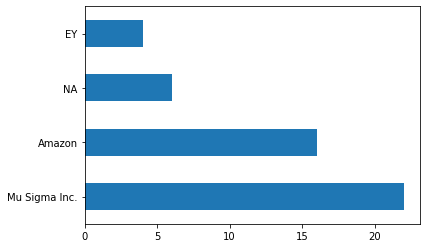

In [62]:
mergedFinalDataset['Previous Company'].value_counts()[:4].plot(kind='barh')

- Only 5 out of more than 450 employees were having no previous work experience.It signifies the importance of previous work experience to get into Amazon as a Business Analyst.
- Majority of the empoyee had experience between 1 and 5 years.

In [74]:
mergedFinalDataset[mergedFinalDataset['Previous Experience (in months)']==0]

,Unnamed: 0,ProfileId,Employee Name,Company,Job Title,Location,Link,Previous Company,Previous Experience (in months),Last Degree,Last University,Top skills
90,97,loretta-john-a667b3164,Loretta John,Amazon,Business Analyst II,Greater Seattle Area,https://www.linkedin.com/in/loretta-john-a667b...,NA,0,Master,"University of California, Los Angeles","[Management, Data Analysis, Data Management]"
144,164,elias-kelehan,Elias Kelehan,Amazon,Business Analyst at Amazon,Greater Denver Area,https://www.linkedin.com/in/elias-kelehan/,NA,0,Master,University of Northern Colorado,"[Leadership, Public Speaking, Strategic Planning]"
282,331,2061147,Rio D.,Amazon,ACES Business Analyst at Amazon,Greater Seattle Area,https://www.linkedin.com/in/2061147/,NA,0,Bachelor,University of Washington - Michael G. Foster S...,"[Fraud Detection, Customer Service, Team Leade..."
296,346,sumitarora8,Sumit Arora,Amazon,Business Analyst at Amazon,"Bengaluru Area, India",https://www.linkedin.com/in/sumitarora8/,NA,0,Bachelor,Krishna Engineering College (AKTU),"[Business Intelligence (BI), Reporting & Analy..."
332,387,mike-armistead-670397189,Mike Armistead,Amazon,"Business Analyst, Workforce Staffing a...","Greater Nashville Area, TN",https://www.linkedin.com/in/mike-armistead-670...,NA,0,Bachelor,Middle Tennessee State University (MTSU),"[Human Resources Information Systems (HRIS), N..."
393,468,robert-johnson-b605886a,Robert Johnson,Amazon,ACES Business Analyst at Amazon,"Huntington, West Virginia Area",https://www.linkedin.com/in/robert-johnson-b60...,NA,0,Master,Northern Kentucky University,"[Microsoft Excel, Data Analysis, Customer Serv..."


- Masters degree seems to be an importart factor to get employed as a Business Analyst at Amazon.

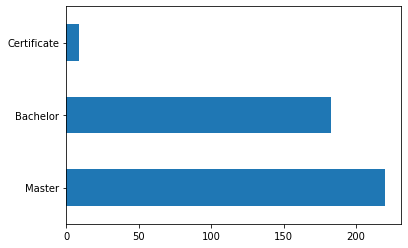

In [75]:
mergedFinalDataset['Last Degree'].value_counts()[:3].plot(kind='barh')

- University of Washington, Northeaster University and UTD are the top Universities. 
These information would help any student to decide on the universitys they want to attend.

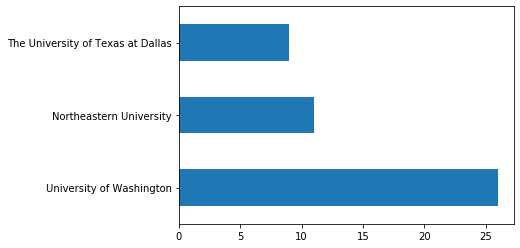

In [76]:
mergedFinalDataset['Last University'].value_counts()[:3].plot(kind='barh')

- SQL, Data ANalysis,Microsoft Excel, Mocrosoft Office Python and R are the top skills required to be successful as a Business Analyst.

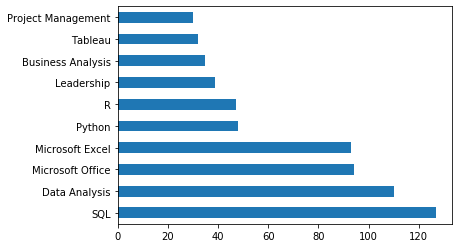

In [77]:
skill['Skill'].value_counts()[:10].plot(kind='barh')